In [58]:
import ast

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

from rgfn.gfns.reaction_gfn.reaction_env import ReactionEnv
from rgfn.gfns.reaction_gfn.api.reaction_data_factory import ReactionDataFactory
from rgfn.gfns.reaction_gfn.api.reaction_api import Molecule

In [2]:
# Initialize environment with same config as training
data_factory = ReactionDataFactory(
    fragment_path='../data/small/fragments.txt',
    reaction_path='../data/small/templates.txt',
    cost_path='../data/small/fragment_to_real_cost.json',
    yield_path='../data/small/templates_yields.csv'
)

env = ReactionEnv(
    data_factory=data_factory,
    max_num_reactions=4,
    use_cache=True,
    share_cache=True,
    use_recurrence=False
)

Using 418 fragments, 112 reactions, and 206 anchored reactions


In [3]:
paths = pd.read_csv('../final_paths.csv')

In [4]:
final_mols = paths['molecule'].values

In [14]:
print("="*60)
final_smiles = final_mols[12]
final_mol = Molecule(final_smiles)

print(f"Terminal state molecule: {final_smiles[:60]}...")

trajectories = env._enumerate_decompositions(final_mol, n_reactions=4)

print("Length of trajectories:", len(trajectories))

unique_trajectories = set()
for traj in trajectories:
    unique_trajectories.add(tuple(traj))

print("Number of unique trajectories:", len(unique_trajectories))

unique_trajectories = list(unique_trajectories)

Terminal state molecule: c1ccc2c(c1)c(CNC1CN(C3CNC3)C1)cn2Cc1ccc(-c2nnn(CC3CC3)n2)cc1...
Length of trajectories: 1536
Number of unique trajectories: 90


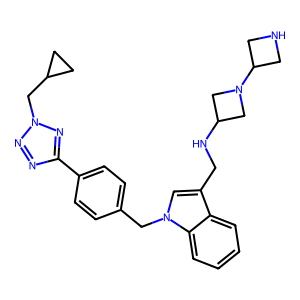

In [15]:
Draw.MolToImage(Chem.MolFromSmiles(final_smiles))

How many unique fragments and reactions are there?

In [16]:
unique_frags = set()
unique_intermediates = set()
unique_reactions = set()
for traj in unique_trajectories:
    if isinstance(traj[0], str):
        unique_frags.add(traj[0])
    for item in traj[1:]:
        if isinstance(item, str):
            unique_intermediates.add(item)
        elif isinstance(item, tuple):
            unique_reactions.add(item[0])
            for fragment in item[1:]:
                unique_frags.add(fragment)

print(f"Number of unique fragments: {len(unique_frags)}")
print(f"Number of unique intermediates: {len(unique_intermediates)}")
print(f"Number of unique reactions: {len(unique_reactions)}")

Number of unique fragments: 4
Number of unique intermediates: 10
Number of unique reactions: 6


In [17]:
# for i, final_mol in enumerate(final_mols):
#     final_mol = Molecule(final_mol)
#     trajectories = env._enumerate_decompositions(final_mol, n_reactions=4)

#     unique_trajectories = set()
#     for traj in trajectories:
#         unique_trajectories.add(tuple(traj))
    
#     unique_trajectories = list(unique_trajectories)

#     unique_frags = set()
#     unique_intermediates = set()
#     unique_reactions = set()
#     for traj in unique_trajectories:
#         if isinstance(traj[0], str):
#             unique_frags.add(traj[0])

# if len(unique_frags) > 5:
#     print(f"Number of unique trajectories: {len(unique_trajectories)}")
#     print(f"Number of unique fragments: {len(unique_frags)}")
#     print(f"Molecule index: {i}, smiles: {final_mol}")

  =====   Unique fragments   =====  


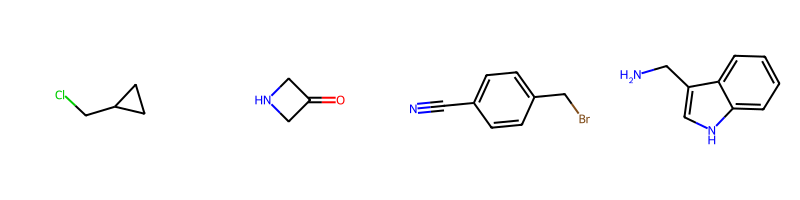

  =====   Unique intermediates   =====  


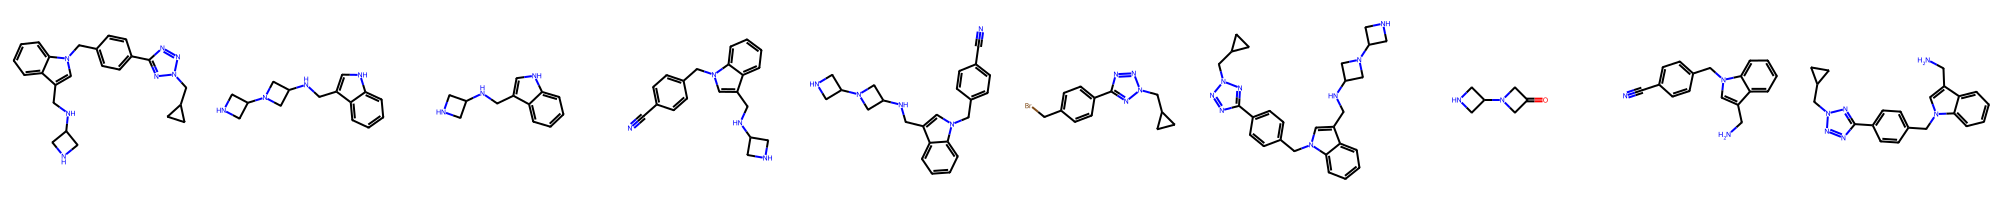

In [20]:
unique_frag_mols = [Chem.MolFromSmiles(frag) for frag in unique_frags]
unique_intermediate_mols = [Chem.MolFromSmiles(frag) for frag in unique_intermediates]

print("  =====   Unique fragments   =====  ")
img = Draw.MolsToGridImage(unique_frag_mols, molsPerRow=len(unique_frag_mols))
display(img)

print("  =====   Unique intermediates   =====  ")
img = Draw.MolsToGridImage(unique_intermediate_mols, molsPerRow=len(unique_intermediate_mols))
display(img)

In [57]:
def visualize_trajectory(trajectory, idx):
    print(f"\n===Trajectory {idx}===")
    
    mol_objects = []

    for i, item in enumerate(trajectory):
        if isinstance(item, str):
            mol_objects.append(Chem.MolFromSmiles(item))
        elif isinstance(item, tuple):
            fragments = item[1:]
            for frag in fragments:
                mol_objects.append(Chem.MolFromSmiles(frag))

    return mol_objects

def parse_trajectory_string(trajectory_str):
    """
    Parse a trajectory string from CSV into a list of items (SMILES strings and reaction tuples)
    """
    try:
        # Use ast.literal_eval to safely parse the string representation
        parsed_trajectory = ast.literal_eval(trajectory_str)
        return parsed_trajectory
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing trajectory string: {e}")
        return None

# Parse the original trajectory
parsed_original_trajectory = parse_trajectory_string(original_trajectory)



===Trajectory 1===


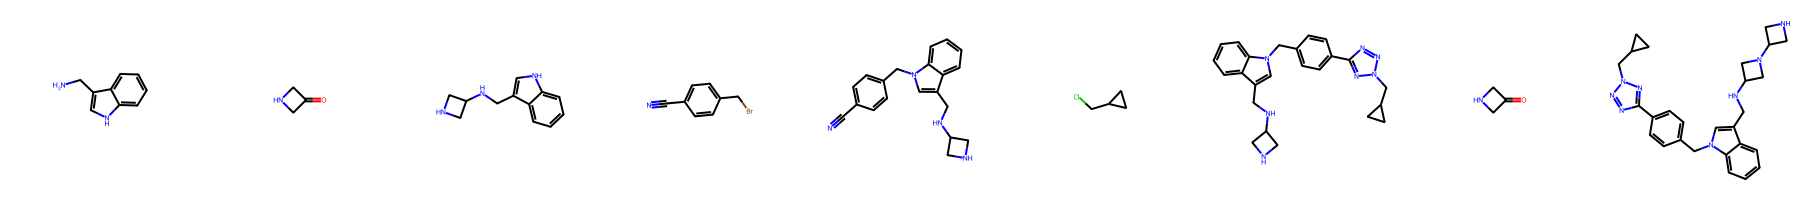


===Trajectory 2===


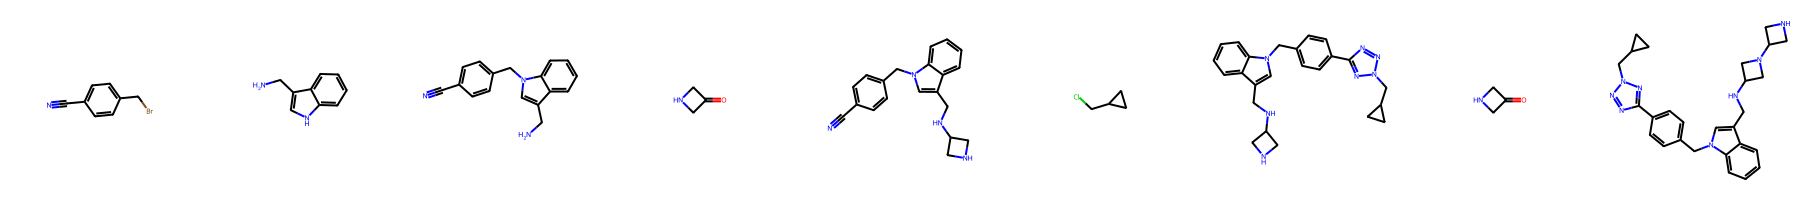


===Trajectory 3===


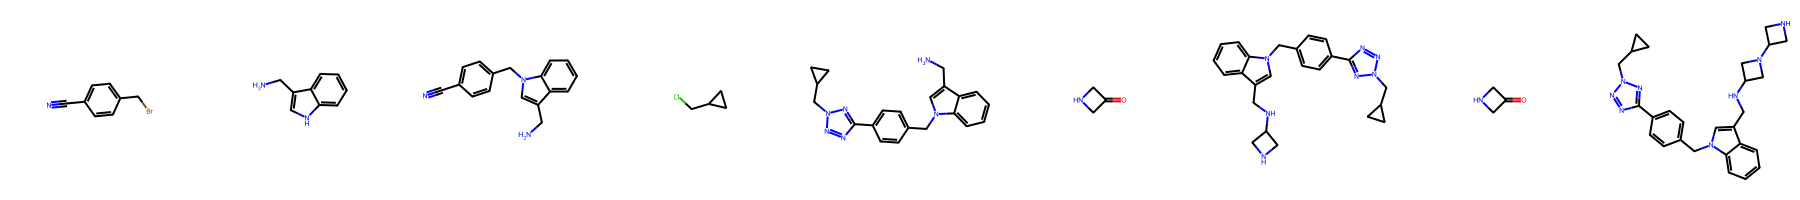


===Trajectory 4===


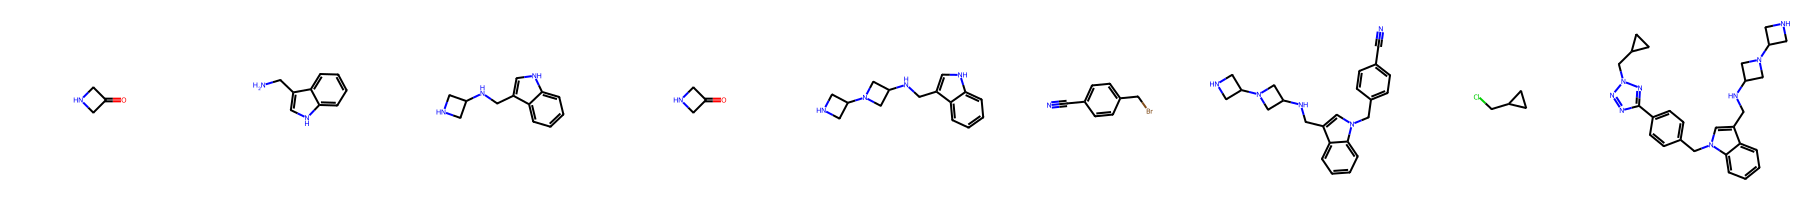


===Trajectory 5===


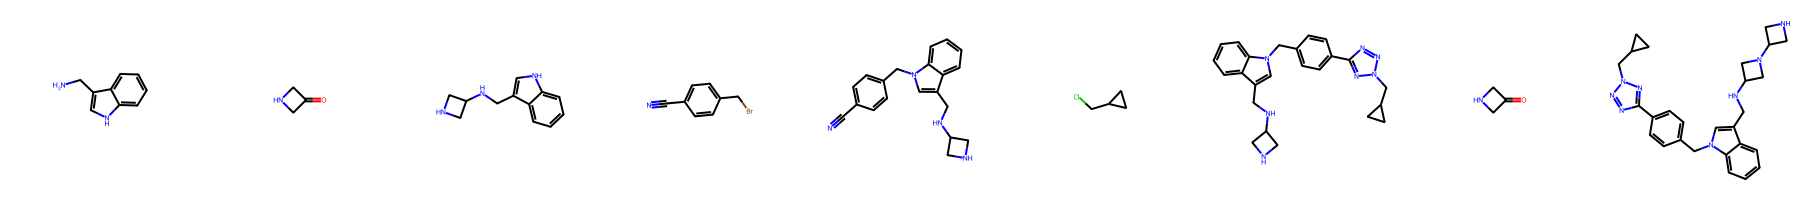

In [55]:
for i, traj in enumerate(unique_trajectories[:5]):
    mols = visualize_trajectory(unique_trajectories[i], i+1)

    img = Draw.MolsToGridImage(mols, molsPerRow=len(mols))
    display(img)



===Trajectory 1===


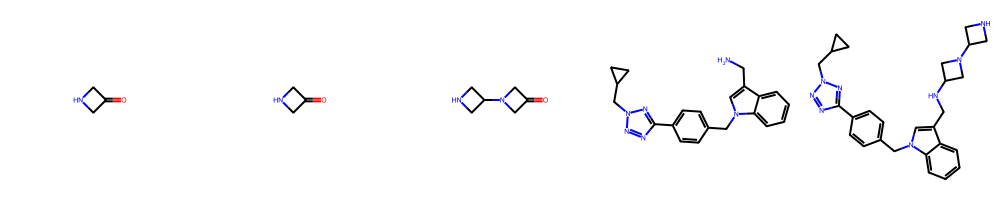

In [56]:
training_trajectories = paths['path'].values
original_trajectory = training_trajectories[12]
parsed_original_trajectory = parse_trajectory_string(original_trajectory)
mols = visualize_trajectory(parsed_original_trajectory, 1)
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols))
display(img)


# Medium library

In [62]:
data_factory = ReactionDataFactory(
    fragment_path='../data/enamine/medium/fragments.txt',
    reaction_path='../data/enamine/templates.txt',
    cost_path='../data/enamine/medium/fragments_to_real_cost.json',
    yield_path=None
)

env = ReactionEnv(
    data_factory=data_factory,
    max_num_reactions=4,
    use_cache=True,
    share_cache=True,
    use_recurrence=False
)


Using 64000 fragments, 105 reactions, and 197 anchored reactions


In [65]:
print("="*60)
final_smiles = final_mols[12]
final_mol = Molecule(final_smiles)

print(f"Terminal state molecule: {final_smiles[:60]}...")

trajectories = env._enumerate_decompositions(final_mol, n_reactions=2)

print("Length of trajectories:", len(trajectories))

unique_trajectories = set()
for traj in trajectories:
    unique_trajectories.add(tuple(traj))

print("Number of unique trajectories:", len(unique_trajectories))

unique_trajectories = list(unique_trajectories)

Terminal state molecule: c1ccc2c(c1)c(CNC1CN(C3CNC3)C1)cn2Cc1ccc(-c2nnn(CC3CC3)n2)cc1...
Length of trajectories: 0
Number of unique trajectories: 0
